In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_year_data_dt(year):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = year

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]
    
    df_cultures = df_cultures.apply(lambda x: x.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures.columns = pd.date_range(start='2014-01-06', end='2014-12-29', freq='W-MON')
    df_cultures['yield'] = yield_by_culture
    return df_cultures

In [142]:
def get_year_data_ind(year):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = str(year)

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]

    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures.columns = range(1, 53)
    df_cultures = df_cultures.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures['yield'] = yield_by_culture
    
    return df_cultures

In [ ]:
def get_mean_week_ndvi():
    FILE = '../Сводная вегетация.xlsx'
    SHEET = str(year)

    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]

    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures.columns = range(1, 53)
    df_cultures = df_cultures.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures['yield'] = yield_by_culture
    
    return df_cultures

In [ ]:
FILE = '../Сводная вегетация.xlsx'
#2012
df = pd.read_excel(FILE, sheetname=2012, header=1)
NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
CULTURE_COLUMN = 'Культура ' + SHEET

df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
df_cultures = df_cultures[NDVI_COLUMNS]

df_cultures = df_cultures[df_cultures.columns[::-1]]
df_cultures.columns = range(1, 53)
df_cultures = df_cultures.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
#2013
df = pd.read_excel(FILE, sheetname=2013, header=1)
NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
CULTURE_COLUMN = 'Культура ' + SHEET

df_cultures2 = df.groupby(df[CULTURE_COLUMN]).mean()
df_cultures2 = df_cultures2[NDVI_COLUMNS]

df_cultures2 = df_cultures2[df_cultures2.columns[::-1]]
df_cultures2.columns = range(1, 53)
df_cultures2 = df_cultures2.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
df_cultures2 = df_cultures2.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
#merge 2012 & 2013
df1=pd.concat((df_cultures, df_cultures2), axis=1).mean(axis=1)
#2014
df = pd.read_excel(FILE, sheetname=2014, header=1)
NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
CULTURE_COLUMN = 'Культура ' + SHEET

df_cultures = df.groupby(df[CULTURE_COLUMN]).mean()
df_cultures = df_cultures[NDVI_COLUMNS]

df_cultures = df_cultures[df_cultures.columns[::-1]]
df_cultures.columns = range(1, 53)
df_cultures = df_cultures.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
#2015
df = pd.read_excel(FILE, sheetname=2015, header=1)
NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
CULTURE_COLUMN = 'Культура ' + SHEET

df_cultures2 = df.groupby(df[CULTURE_COLUMN]).mean()
df_cultures2 = df_cultures2[NDVI_COLUMNS]

df_cultures2 = df_cultures2[df_cultures2.columns[::-1]]
df_cultures2.columns = range(1, 53)
df_cultures2 = df_cultures2.apply(lambda x: x.T.interpolate(method='linear'), axis=1)
df_cultures2 = df_cultures2.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
#merge 2014 & 2015
df2=pd.concat((df_cultures, df_cultures2), axis=1).mean(axis=1)
#final merge
df=pd.concat((df1, df2), axis=1).mean(axis=1)

In [143]:
def culture_year_ndvi(year, culture):
    FILE = '../Сводная вегетация.xlsx'
    SHEET = str(year)
    culture = culture
    df = pd.read_excel(FILE, sheetname=SHEET, header=1)

    NDVI_COLUMNS = [col for col in df.columns if 'неделя' in col]
    #NDVI_COLUMNS = [x for x in NDVI_COLUMNS if x <='неделя 51']
    CULTURE_COLUMN = 'Культура ' + SHEET
    YIELD_COLUMN = 'Урожайность, т./га.'

    df_cultures = df[df[CULTURE_COLUMN] == culture]
    df_cultures = df_cultures[df_cultures[YIELD_COLUMN].notnull()]
    yield_by_culture = df_cultures[YIELD_COLUMN]
    df_cultures = df_cultures[NDVI_COLUMNS]
    df_cultures

    df_cultures = df_cultures.apply(lambda x: x.interpolate(method='linear'), axis=1)
    df_cultures = df_cultures.apply(lambda x: x.fillna(x[x.first_valid_index()]), axis=1)
    df_cultures = df_cultures[df_cultures.columns[::-1]]
    df_cultures = df_cultures[df_cultures.columns[:52]]
    print(SHEET)
    df_cultures.columns = pd.date_range(start=SHEET+'-01-03', end=SHEET+'-12-31', freq='W-MON')
    df_cultures['yield'] = yield_by_culture
    df_cultures = df_cultures.reset_index()
    return df_cultures

In [136]:
# for i in range(2012,2016):
#     df=culture_year_ndvi(i, 'Подсолнечник')
#     df.to_csv('Sunflower_'+str(i)+'.csv')

2012
2013
2014
2015


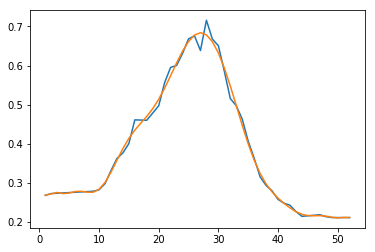

In [183]:
import numpy.polynomial.polynomial as poly

dfc14 = get_for_gen_crop(2014)
dfc14.drop('yield', axis=1, inplace=True)
yt = dfc14.loc['Кукуруза'].values
xt = range(1, 53)
plt.plot(xt, yt)
coeff = poly.polyfit(x=xt, y=yt, deg=18)
x_new = np.linspace(xt[0], xt[-1], num=len(xt))
ffit = poly.polyval(x_new, coeff)
plt.plot(x_new, ffit)

In [15]:

# from sklearn import svm
# from sklearn import metrics
# dfc14 = get_year_data('2014')
# y = dfc14['yield']
# X = dfc14.drop('yield', axis=1).as_matrix()

# dfc15 = get_year_data('2015')
# y_train = dfc15['yield']
# X_train = dfc15.drop('yield', axis=1).as_matrix()

# model = svm.SVR()
# model.fit(X, y)
# print(y)
# model.predict(dfc15.drop('yield', axis=1).as_matrix())
# metrics.accuracy_score(

Культура 2014
Кукуруза          3.049583
Подсолнечник      2.185962
Пшеница озимая    4.244634
Рапс озимый       2.335000
Соя               1.610000
Ячмень озимый     3.121111
Name: yield, dtype: float64


array([ 2.68139436,  2.66933979,  2.6667804 ,  2.70276995,  2.67514743,
        2.71115743])